# **Data Analysis on Internet Usage dataset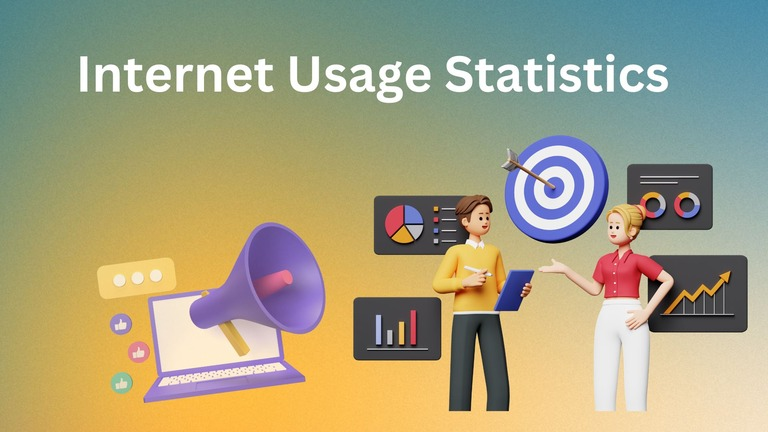**

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Load the Dataset**

In [4]:
df=pd.read_csv('/content/internet_session.csv')

In [5]:
#check the first few rows of the data
df.head()

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10 21:20:44,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11 00:37:42,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout
4,user1,2022-05-11 02:59:38,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout


In [44]:
df.tail()

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
4707,user9,2022-11-04 01:11:34,414,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout
4708,user9,2022-11-04 10:26:09,23,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout
4709,user9,2022-11-04 20:41:42,84,10.55.15.186,DA:2F:97:0E:B7:D0,18995.20,373657.60,392652.80,Idle-Timeout
4710,user9,2022-11-05 00:21:06,529,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.40,640368.64,Idle-Timeout
4711,user9,2022-11-05 20:55:37,66,10.55.2.33,DA:2F:97:0E:B7:D0,21237.76,298536.96,319774.72,Unknown


# **Data Inspection**

In [6]:
#check for missing values
print(df.isnull().sum())

name                     0
start_time               0
usage_time               0
IP                       0
MAC                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    9
dtype: int64


In [7]:
#since there are 9 missing values in one of the column perform this
df['seession_break_reason']=df['seession_break_reason'].fillna('Unknown')

In [8]:
#check for missing values again
print(df.isnull().sum())

name                     0
start_time               0
usage_time               0
IP                       0
MAC                      0
upload                   0
download                 0
total_transfer           0
seession_break_reason    0
dtype: int64


In [10]:
#get an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   4712 non-null   object 
 1   start_time             4712 non-null   object 
 2   usage_time             4712 non-null   object 
 3   IP                     4712 non-null   object 
 4   MAC                    4712 non-null   object 
 5   upload                 4712 non-null   object 
 6   download               4712 non-null   object 
 7   total_transfer         4712 non-null   float64
 8   seession_break_reason  4712 non-null   object 
dtypes: float64(1), object(8)
memory usage: 331.4+ KB


# **Observations:**
The dataset contains 4712 rows and 9 columns.
Most columns are of type object, except for total_transfer which is float64.
Columns like start_time, usage_time, upload, and download might need type conversions to be more useful for analysis.


In [14]:
#Convert Column Data Types
df['start_time']=pd.to_datetime(df['start_time'])


In [28]:
# Function to convert usage time to seconds
def usage_time_to_seconds(time_str):
    try:
        minutes, seconds = map(int, time_str.split(':'))
        return minutes * 60 + seconds
    except (ValueError, AttributeError):
        return None  # Handle cases where conversion fails

# Apply the function to the 'usage_time' column
df['usage_time'].apply(usage_time_to_seconds)
# Now you have a new column 'usage_time_seconds' with the usage time in seconds
df.head()

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10 02:59:32,36,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10 18:53:27,109,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10 21:20:44,95,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11 00:37:42,26,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout
4,user1,2022-05-11 02:59:38,11,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout


# upload and download to numeric: These appear to be stored as strings. Convert them to floats

In [34]:
invalid_uploads = df[~df['upload'].str.replace('.', '', 1).str.isdigit()]
print("Invalid 'upload' values:")
print(invalid_uploads)

Invalid 'upload' values:
       name          start_time  usage_time           IP                MAC  \
1643  user3 2022-11-04 19:00:27           0   10.55.1.89  C8:3D:DC:CF:16:C6   
1652  user4 2022-05-16 18:55:22           1  10.55.11.35  92:02:4F:EE:EB:3F   

     upload download  total_transfer seession_break_reason  
1643   240B     904B            1.12          Idle-Timeout  
1652   508B    12.95           13.45          Idle-Timeout  


In [38]:
# Convert 'upload' column to string type before applying string operations
df['upload'] = df['upload'].astype(str)

# Remove the 'B' character and any extra spaces
df['upload'] = df['upload'].str.replace('B', '', regex=False).str.strip()

# Convert to numeric, forcing invalid entries to NaN
df['upload'] = pd.to_numeric(df['upload'], errors='coerce')

# Handle NaN values if necessary (e.g., fill with 0)
df['upload'].fillna(0, inplace=True)

# Check the result
print(df['upload'].dtype)  # Should be float64
print(df['upload'].head())  # Verify the cleaned data

float64
0    15861.76
1    16957.44
2    14080.00
3     5242.88
4    22067.20
Name: upload, dtype: float64


<ipython-input-38-f271d266eca3>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['upload'].fillna(0, inplace=True)


In [39]:
# Replace NaN values with 0 (without using inplace=True)
df['upload'] = df['upload'].fillna(0)


In [40]:
df['download'] = pd.to_numeric(df['download'], errors='coerce')


In [41]:
print(df.dtypes)  # Confirm 'upload' and 'download' are float
print(df[['upload', 'download']].head())  # View the cleaned data


name                             object
start_time               datetime64[ns]
usage_time                        int64
IP                               object
MAC                              object
upload                          float64
download                        float64
total_transfer                  float64
seession_break_reason            object
dtype: object
     upload   download
0  15861.76  333168.64
1  16957.44  212152.32
2  14080.00  195153.92
3   5242.88   40806.40
4  22067.20   10772.48


# **Exploratory Data Analysis**

In [45]:
# Basic statistics for numerical columns
df.describe()

,start_time,usage_time,upload,download,total_transfer
count,4712,4712.000000,4.712000e+03,4.711000e+03,4.712000e+03
mean,2022-08-08 13:41:42.891341568,130.362054,3.382026e+04,3.966531e+05,4.303743e+05
min,2022-05-09 22:52:41,0.000000,2.940000e+00,9.600000e+00,1.120000e+00
25%,2022-06-14 18:56:17.500000,31.000000,6.082560e+03,5.206528e+04,6.187008e+04
50%,2022-08-19 14:49:10.500000,79.000000,1.532928e+04,1.782682e+05,2.029312e+05
75%,2022-09-25 02:19:22,169.000000,3.399680e+04,4.596173e+05,4.996915e+05
max,2022-11-05 21:54:24,3621.000000,2.841641e+06,2.790261e+07,2.855272e+07
std,NaN,160.642865,9.492629e+04,9.650734e+05,9.952647e+05


# **We can observe that the user name has been repeated many times,In this case we can group the details of the user**

In [52]:
df_grouped = df.groupby('name').agg({
    'upload': 'sum',
    'download': 'sum',
    'total_transfer': 'sum',
    'usage_time': 'sum',

})
print(df_grouped.head())  # View the aggregated data


            upload      download  total_transfer  usage_time
name                                                        
user1  18670602.67  1.823478e+08    2.009867e+08       69016
user2  13338455.25  2.621992e+08    2.754995e+08       46949
user3  15363851.70  1.778702e+08    1.932351e+08       72358
user4  24509708.25  2.963289e+08    3.208737e+08      117989
user5  21622099.91  1.198943e+08    1.415139e+08       26834


# **Necessary Data Cleaning has Been done till now,Let's do some exercises on**

# **1.NUMPY**

Exercise-1:convert to arrays

In [53]:
#Convert Columns to NumPy Arrimport numpy as np

upload_array = df['upload'].to_numpy()

# Display the arrays
print("Upload Array:", upload_array[:5])

Upload Array: [15861.76 16957.44 14080.    5242.88 22067.2 ]


In [54]:
download_array = df['download'].to_numpy()
print("Download Array:", download_array[:5])


Download Array: [333168.64 212152.32 195153.92  40806.4   10772.48]


In [55]:
total_transfer_array = df['total_transfer'].to_numpy()
print("Total Transfer Array:", total_transfer_array[:5])


Total Transfer Array: [349030.4  229109.76 209233.92  46049.28  32839.68]


In [66]:
usage_time_array = df['usage_time'].to_numpy()
print("Usage Time Array:", usage_time_array[:5])

Usage Time Array: [ 36 109  95  26  11]


Exercis-2:Basic Element-Wise operations

In [56]:
# Element-wise addition, subtraction, and multiplication between upload and download
upload_plus_download = upload_array + download_array
upload_minus_download = upload_array - download_array
upload_times_download = upload_array * download_array

# Display results for the first 5 values
print("Upload + Download:", upload_plus_download[:5])
print("Upload - Download:", upload_minus_download[:5])
print("Upload * Download:", upload_times_download[:5])


Upload + Download: [349030.4  229109.76 209233.92  46049.28  32839.68]
Upload - Download: [-317306.88 -195194.88 -181073.92  -35563.52   11294.72]
Upload * Download: [5.28464101e+09 3.59756024e+09 2.74776719e+09 2.13943058e+08
 2.37718471e+08]


In [65]:
# Calculate statistics for each array
#FOR UPLOAD
mean_upload = np.mean(upload_array)
median_upload = np.median(upload_array)
std_upload = np.std(upload_array)
max_upload = np.max(upload_array)
min_upload = np.min(upload_array)

print(f"Upload - Mean: {mean_upload}, Median: {median_upload}, Std: {std_upload}, Max: {max_upload}, Min: {min_upload}")

Upload - Mean: 33820.25846986417, Median: 15329.28, Std: 94916.21937175175, Max: 2841640.96, Min: 2.94


In [64]:
#FOR DOWNLOAD
mean_download = np.mean(download_array)
median_download = np.median(download_array)
std_download = np.std(download_array)
max_download = np.max(download_array)
min_download = np.min(download_array)

print(f"Download - Mean: {mean_download}, Median: {median_download}, Std: {std_download}, Max: {max_download}, Min: {min_download}")


Download - Mean: nan, Median: nan, Std: nan, Max: nan, Min: nan


In [63]:
#FOR TRANSFER
mean_transfer = np.mean(total_transfer_array)
median_transfer = np.median(total_transfer_array)
std_transfer = np.std(total_transfer_array)
max_transfer = np.max(total_transfer_array)
min_transfer = np.min(total_transfer_array)

print(f"Total Transfer - Mean: {mean_transfer}, Median: {median_transfer}, Std: {std_transfer}, Max: {max_transfer}, Min: {min_transfer}")


Total Transfer - Mean: 430374.3322792869, Median: 202931.2, Std: 995159.0935052024, Max: 28552724.48, Min: 1.12


In [67]:
mean_usage_time = np.mean(usage_time_array)
median_usage_time = np.median(usage_time_array)
std_usage_time = np.std(usage_time_array)
max_usage_time = np.max(usage_time_array)
min_usage_time = np.min(usage_time_array)

print(f"Usage Time - Mean: {mean_usage_time}, Median: {median_usage_time}, Std: {std_usage_time}, Max: {max_usage_time}, Min: {min_usage_time}")

Usage Time - Mean: 130.36205432937183, Median: 79.0, Std: 160.62581765385096, Max: 3621, Min: 0


Exercise-3:RESHAPE AND SIZE DATA


In [71]:
# Combine upload and download into a 2D array
combined_data = np.column_stack((upload_array, download_array))

# Slice the first 5 rows and 2 columns
sliced_data = combined_data[:5, :]

print("Sliced Data (first 5 rows):")
print(sliced_data)


Sliced Data (first 5 rows):
[[ 15861.76 333168.64]
 [ 16957.44 212152.32]
 [ 14080.   195153.92]
 [  5242.88  40806.4 ]
 [ 22067.2   10772.48]]


Exercise-4:SORT THE DATA

In [72]:
# Sort total_transfer in ascending order
sorted_transfer_asc = np.sort(total_transfer_array)

# Sort total_transfer in descending order
sorted_transfer_desc = np.sort(total_transfer_array)[::-1]

print("Sorted Total Transfer (Ascending):", sorted_transfer_asc[:5])  # First 5 for brevity
print("Sorted Total Transfer (Descending):", sorted_transfer_desc[:5])


Sorted Total Transfer (Ascending): [ 1.12 13.45 15.25 18.08 59.76]
Sorted Total Transfer (Descending): [28552724.48 24389877.76 24389877.76 22051553.28 15728640.  ]


In [70]:
usage_time_asc = np.sort(usage_time_array)
usage_time_desc = np.sort(usage_time_array)[::-1]
print("Sorted Usage Time (Ascending):", usage_time_asc[:5])
print("Sorted Usage Time (Descending):", usage_time_desc[:5])

Sorted Usage Time (Ascending): [0 0 0 0 0]
Sorted Usage Time (Descending): [3621 1320 1239 1175 1175]


Exercise 5: Find the Indices of Max and Min Values

In [73]:
# Find indices of max and min values
max_upload_idx = np.argmax(upload_array)
min_upload_idx = np.argmin(upload_array)

max_download_idx = np.argmax(download_array)
min_download_idx = np.argmin(download_array)

max_transfer_idx = np.argmax(total_transfer_array)
min_transfer_idx = np.argmin(total_transfer_array)

min_usage_time_idx = np.argmin(usage_time_array)
max_usage_time_idx = np.argmax(usage_time_array)

print(f"Max Upload Index: {max_upload_idx}, Min Upload Index: {min_upload_idx}")
print(f"Max Download Index: {max_download_idx}, Min Download Index: {min_download_idx}")
print(f"Max Total Transfer Index: {max_transfer_idx}, Min Total Transfer Index: {min_transfer_idx}")
print(f"Min Usage Time Index: {min_usage_time_idx}, Max Usage Time Index: {max_usage_time_idx}")

Max Upload Index: 2569, Min Upload Index: 3420
Max Download Index: 1643, Min Download Index: 1643
Max Total Transfer Index: 3866, Min Total Transfer Index: 1643
Min Usage Time Index: 48, Max Usage Time Index: 2023


# **2.PANDAS**

Exercise 1: View Data

In [77]:
# 1. View the first 5 rows
df.head()


,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10 02:59:32,36,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10 18:53:27,109,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10 21:20:44,95,10.55.2.253,48:E7:DA:58:22:E9,14080.00,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11 00:37:42,26,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.40,46049.28,Idle-Timeout
4,user1,2022-05-11 02:59:38,11,10.55.2.253,48:E7:DA:58:22:E9,22067.20,10772.48,32839.68,Idle-Timeout


In [76]:
# 2. View the last 5 rows
df.tail()


,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
4707,user9,2022-11-04 01:11:34,414,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout
4708,user9,2022-11-04 10:26:09,23,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout
4709,user9,2022-11-04 20:41:42,84,10.55.15.186,DA:2F:97:0E:B7:D0,18995.20,373657.60,392652.80,Idle-Timeout
4710,user9,2022-11-05 00:21:06,529,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.40,640368.64,Idle-Timeout
4711,user9,2022-11-05 20:55:37,66,10.55.2.33,DA:2F:97:0E:B7:D0,21237.76,298536.96,319774.72,Unknown


In [79]:
# 3. Display the data types of each column
df.dtypes


,0
name,object
start_time,datetime64[ns]
usage_time,int64
IP,object
MAC,object
upload,float64
download,float64
total_transfer,float64
seession_break_reason,object


Exercise 2: Filter and Select Data


In [81]:
# 1. Filter rows where session_break_reason is 'Idle-Timeout'
df[df['seession_break_reason'] == 'Idle-Timeout']

# 2. Filter columns upload and download for rows where total_transfer > 100000
df[df['total_transfer'] > 100000][['upload', 'download']]

# 3. Filter rows where upload > download
df[df['upload'] > df['download']]


,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
4,user1,2022-05-11 02:59:38,11,10.55.2.253,48:E7:DA:58:22:E9,22067.20,10772.48,32839.68,Idle-Timeout
42,user1,2022-05-17 17:50:13,36,10.55.9.196,48:E7:DA:58:22:E9,18319.36,9103.36,27422.72,Idle-Timeout
43,user1,2022-05-17 19:10:31,36,10.55.9.196,48:E7:DA:58:22:E9,12072.96,6072.32,18155.52,Idle-Timeout
102,user1,2022-06-01 23:55:42,29,10.55.14.112,48:E7:DA:58:22:E9,6574.08,6389.76,12953.60,Idle-Timeout
119,user1,2022-06-06 23:28:25,222,10.55.0.95,48:E7:DA:58:22:E9,638566.40,543559.68,1184890.88,Idle-Timeout
...,...,...,...,...,...,...,...,...,...
4123,user8,2022-10-23 14:06:17,15,10.55.9.216,2A:7F:97:6A:10:51,167516.16,15421.44,182937.60,Idle-Timeout
4298,user9,2022-06-20 12:45:26,45,10.55.11.82,DA:2F:97:0E:B7:D0,233891.84,131133.44,365025.28,Idle-Timeout
4334,user9,2022-06-28 02:21:30,275,10.55.15.30,DA:2F:97:0E:B7:D0,1352663.04,150353.92,1499463.68,Idle-Timeout
4335,user9,2022-06-28 10:12:03,158,10.55.15.30,DA:2F:97:0E:B7:D0,1174405.12,437923.84,1614807.04,Idle-Timeout


Exercise 3: Creating New Columns

In [85]:
# 1. Create a new column upload_to_download_ratio
df['upload_to_download_ratio'] = df['upload'] / df['download']
print(df[['upload', 'download', 'upload_to_download_ratio']].head())

     upload   download  upload_to_download_ratio
0  15861.76  333168.64                  0.047609
1  16957.44  212152.32                  0.079930
2  14080.00  195153.92                  0.072148
3   5242.88   40806.40                  0.128482
4  22067.20   10772.48                  2.048479


In [84]:
# 2. Create a new column transfer_type based on total_transfer
df['transfer_type'] = pd.cut(df['total_transfer'], bins=[0, 50000, 100000, float('inf')], labels=['Low', 'Medium', 'High'])
print(df[['total_transfer', 'transfer_type']].head())


   total_transfer transfer_type
0       349030.40          High
1       229109.76          High
2       209233.92          High
3        46049.28           Low
4        32839.68           Low


Exercise-4:Loc and ILoc methods

In [86]:
# Select row with label 0
df.loc[0]


,0
name,user1
start_time,2022-05-10 02:59:32
usage_time,36
IP,10.55.14.222
MAC,48:E7:DA:58:22:E9
upload,15861.76
download,333168.64
total_transfer,349030.4
seession_break_reason,Idle-Timeout
upload_to_download_ratio,0.047609


In [87]:
# Select the value at row 0 and column 'upload'
df.loc[0, 'upload']


15861.76

In [88]:
# Select rows 0 to 3 and columns 'upload' and 'download'
df.loc[0:3, ['upload', 'download']]


,upload,download
0,15861.76,333168.64
1,16957.44,212152.32
2,14080.00,195153.92
3,5242.88,40806.40


In [89]:
# Select rows where upload > 10000
df.loc[df['upload'] > 10000]


,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason,upload_to_download_ratio,transfer_type
0,user1,2022-05-10 02:59:32,36,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout,0.047609,High
1,user1,2022-05-10 18:53:27,109,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout,0.079930,High
2,user1,2022-05-10 21:20:44,95,10.55.2.253,48:E7:DA:58:22:E9,14080.00,195153.92,209233.92,Idle-Timeout,0.072148,High
4,user1,2022-05-11 02:59:38,11,10.55.2.253,48:E7:DA:58:22:E9,22067.20,10772.48,32839.68,Idle-Timeout,2.048479,Low
5,user1,2022-05-11 17:17:21,164,10.55.2.253,48:E7:DA:58:22:E9,39905.28,676167.68,716083.20,Idle-Timeout,0.059017,High
...,...,...,...,...,...,...,...,...,...,...,...
4707,user9,2022-11-04 01:11:34,414,10.55.4.189,DA:2F:97:0E:B7:D0,107960.32,2390753.28,2495610.88,Idle-Timeout,0.045157,High
4708,user9,2022-11-04 10:26:09,23,10.55.4.59,DA:2F:97:0E:B7:D0,11407.36,209674.24,221081.60,Idle-Timeout,0.054405,High
4709,user9,2022-11-04 20:41:42,84,10.55.15.186,DA:2F:97:0E:B7:D0,18995.20,373657.60,392652.80,Idle-Timeout,0.050836,High
4710,user9,2022-11-05 00:21:06,529,10.55.4.159,DA:2F:97:0E:B7:D0,46602.24,593766.40,640368.64,Idle-Timeout,0.078486,High


In [90]:
# Select rows where upload > 10000 and columns 'upload' and 'download'
df.loc[df['upload'] > 10000, ['upload', 'download']]


,upload,download
0,15861.76,333168.64
1,16957.44,212152.32
2,14080.00,195153.92
4,22067.20,10772.48
5,39905.28,676167.68
...,...,...
4707,107960.32,2390753.28
4708,11407.36,209674.24
4709,18995.20,373657.60
4710,46602.24,593766.40


In [91]:
# Select the first row (row position 0)
df.iloc[0]


,0
name,user1
start_time,2022-05-10 02:59:32
usage_time,36
IP,10.55.14.222
MAC,48:E7:DA:58:22:E9
upload,15861.76
download,333168.64
total_transfer,349030.4
seession_break_reason,Idle-Timeout
upload_to_download_ratio,0.047609


In [92]:
# Select the value at row 0 and column 1 (position-based indexing)
df.iloc[0, 1]


Timestamp('2022-05-10 02:59:32')

In [93]:
# Select rows 0 to 3 and columns 0 and 2
df.iloc[0:3, [0, 2]]


,name,usage_time
0,user1,36
1,user1,109
2,user1,95


In [94]:
# Select all rows and columns 1 and 2 (positions)
df.iloc[:, 1:3]


,start_time,usage_time
0,2022-05-10 02:59:32,36
1,2022-05-10 18:53:27,109
2,2022-05-10 21:20:44,95
3,2022-05-11 00:37:42,26
4,2022-05-11 02:59:38,11
...,...,...
4707,2022-11-04 01:11:34,414
4708,2022-11-04 10:26:09,23
4709,2022-11-04 20:41:42,84
4710,2022-11-05 00:21:06,529


In [95]:
# Select the last row
df.iloc[-1]


,4711
name,user9
start_time,2022-11-05 20:55:37
usage_time,66
IP,10.55.2.33
MAC,DA:2F:97:0E:B7:D0
upload,21237.76
download,298536.96
total_transfer,319774.72
seession_break_reason,Unknown
upload_to_download_ratio,0.071139


In [96]:
# Select rows 0 to 3 and columns 0 and 2 (based on positions)
df.iloc[0:3, [0, 2]]

,name,usage_time
0,user1,36
1,user1,109
2,user1,95


Exercise-5:Correlation

In [98]:
# Calculate the correlation matrix, excluding non-numeric columns.
df.corr(numeric_only=True)

,usage_time,upload,download,total_transfer,upload_to_download_ratio
usage_time,1.000000,0.255389,0.371273,0.384396,-0.052335
upload,0.255389,1.000000,0.275267,0.362321,0.285567
download,0.371273,0.275267,1.000000,0.995782,-0.043194
total_transfer,0.384396,0.362321,0.995782,1.000000,-0.014637
upload_to_download_ratio,-0.052335,0.285567,-0.043194,-0.014637,1.000000


Exercise-6:Using Series

In [99]:
upload_series = df['upload']
print(upload_series.head())


0    15861.76
1    16957.44
2    14080.00
3     5242.88
4    22067.20
Name: upload, dtype: float64


In [100]:
download_series = df['download']
print(download_series.head())


0    333168.64
1    212152.32
2    195153.92
3     40806.40
4     10772.48
Name: download, dtype: float64


In [101]:
total_transfer_series = df['total_transfer']
print(total_transfer_series.head())


0    349030.40
1    229109.76
2    209233.92
3     46049.28
4     32839.68
Name: total_transfer, dtype: float64


# **3.DATA VISUALIZATION USING MATPLOTLIB AND SEABORN**

Exercise-1:Plotting a Histogram

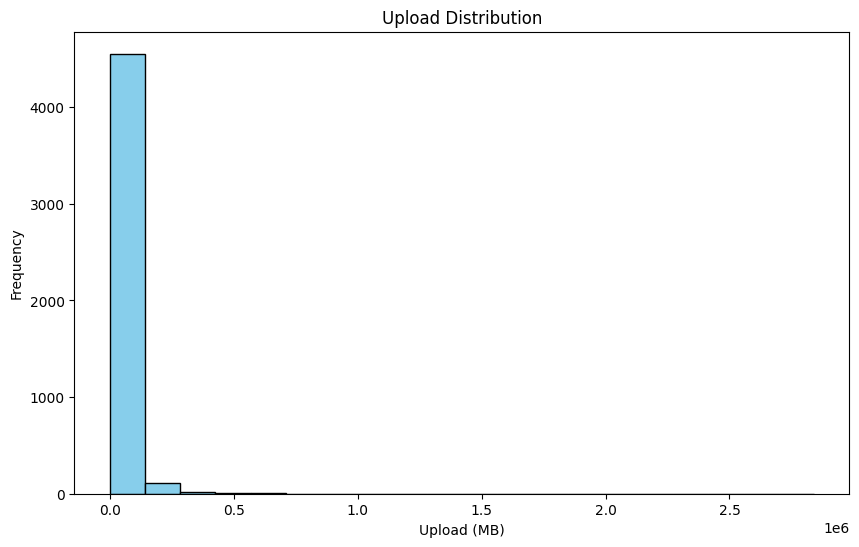

In [102]:
import matplotlib.pyplot as plt

# Plotting the 'upload' column as a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['upload'], bins=20, color='skyblue', edgecolor='black')
plt.title('Upload Distribution')
plt.xlabel('Upload (MB)')
plt.ylabel('Frequency')
plt.show()


Exercise-2:Plotting a Bar Plot

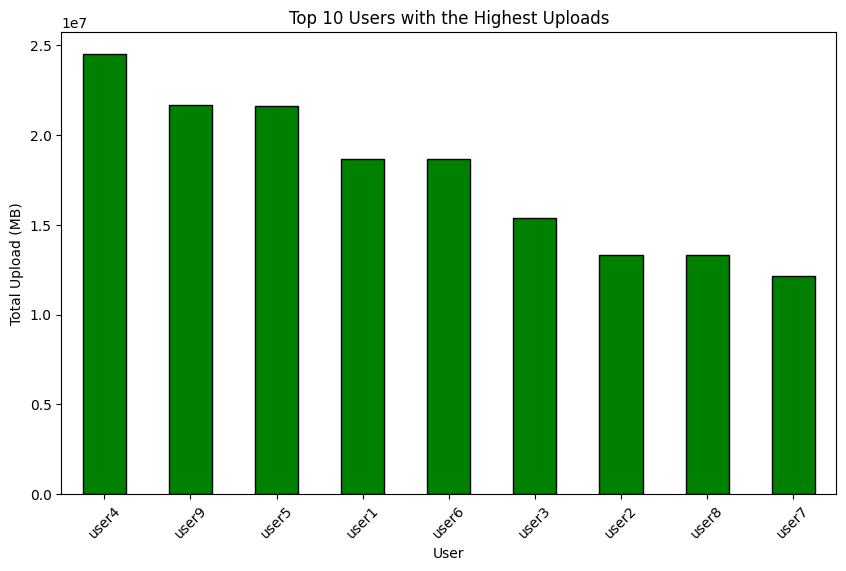

In [103]:
# Grouping data by 'name' and summing up the 'upload' values
upload_by_user = df.groupby('name')['upload'].sum().sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
upload_by_user.head(10).plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Users with the Highest Uploads')
plt.xlabel('User')
plt.ylabel('Total Upload (MB)')
plt.xticks(rotation=45)
plt.show()


Exercise-3: Plotting a Line Plot

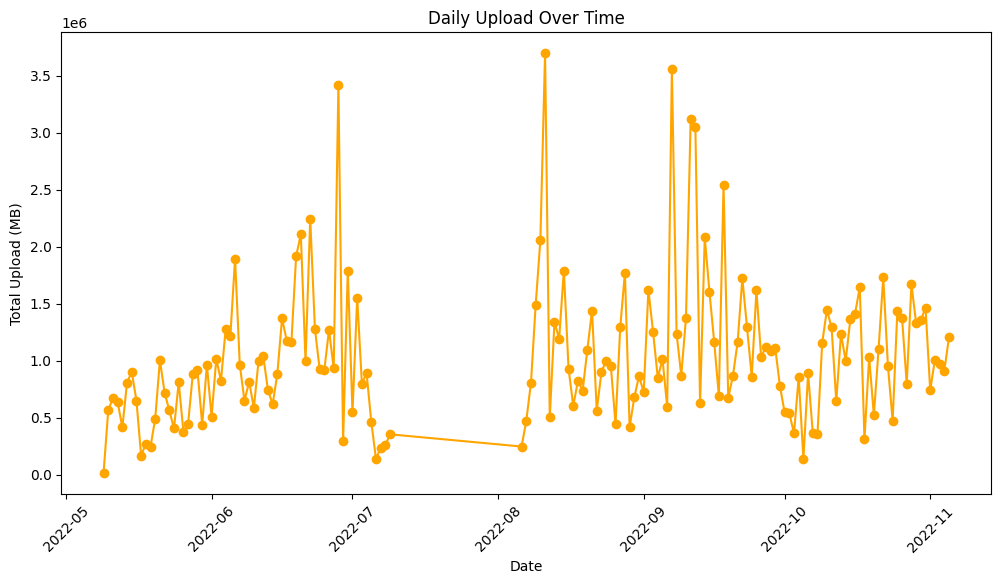

In [104]:
# Converting 'start_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# Grouping the data by date and summing the 'upload'
df['date'] = df['start_time'].dt.date
daily_upload = df.groupby('date')['upload'].sum()

# Plotting a line plot
plt.figure(figsize=(12, 6))
daily_upload.plot(kind='line', color='orange', marker='o')
plt.title('Daily Upload Over Time')
plt.xlabel('Date')
plt.ylabel('Total Upload (MB)')
plt.xticks(rotation=45)
plt.show()


Exercise-4:Plotting a Scatter Plot

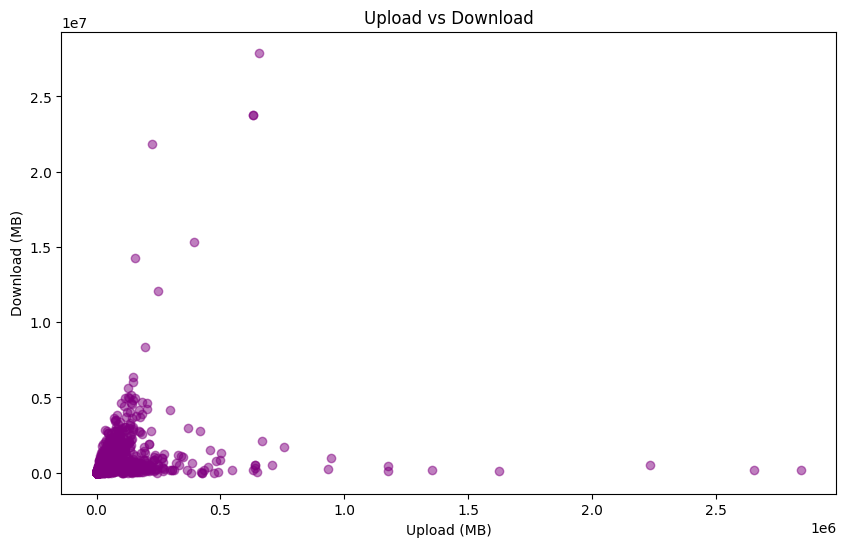

In [105]:
# Plotting the scatter plot between 'upload' and 'download'
plt.figure(figsize=(10, 6))
plt.scatter(df['upload'], df['download'], color='purple', alpha=0.5)
plt.title('Upload vs Download')
plt.xlabel('Upload (MB)')
plt.ylabel('Download (MB)')
plt.show()


Exercise-5:Box Plot

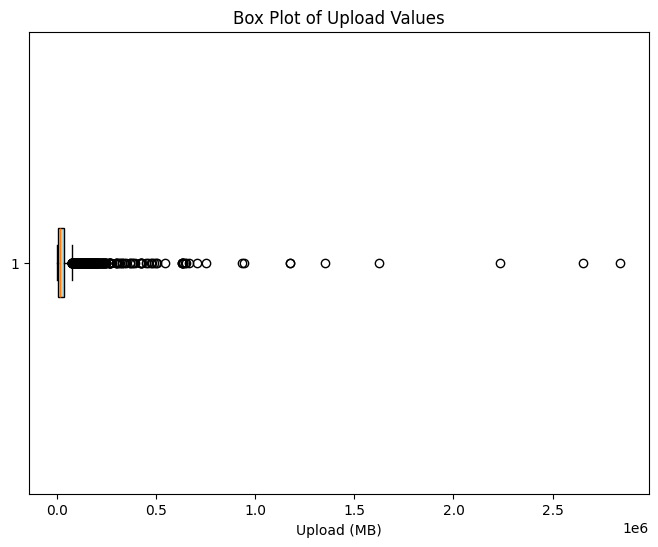

In [106]:
# Plotting a box plot for the 'upload' values
plt.figure(figsize=(8, 6))
plt.boxplot(df['upload'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title('Box Plot of Upload Values')
plt.xlabel('Upload (MB)')
plt.show()


Exercise-6:Correlation Matrix Heatmap

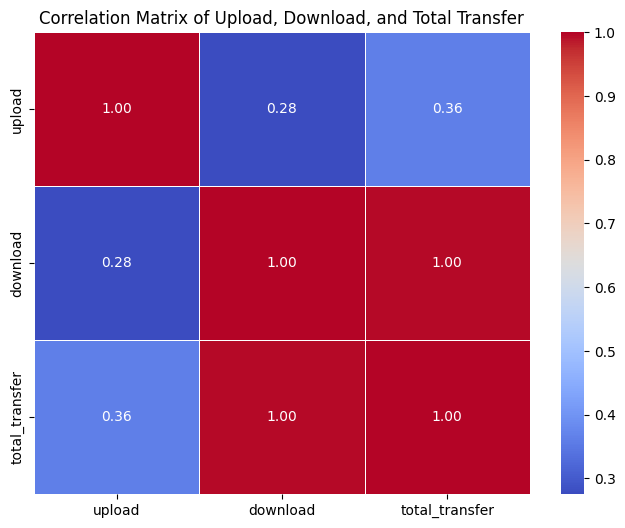

In [107]:
import seaborn as sns

# Calculating the correlation matrix
correlation_matrix = df[['upload', 'download', 'total_transfer']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Upload, Download, and Total Transfer')
plt.show()


Exercise-7:Pie Chart

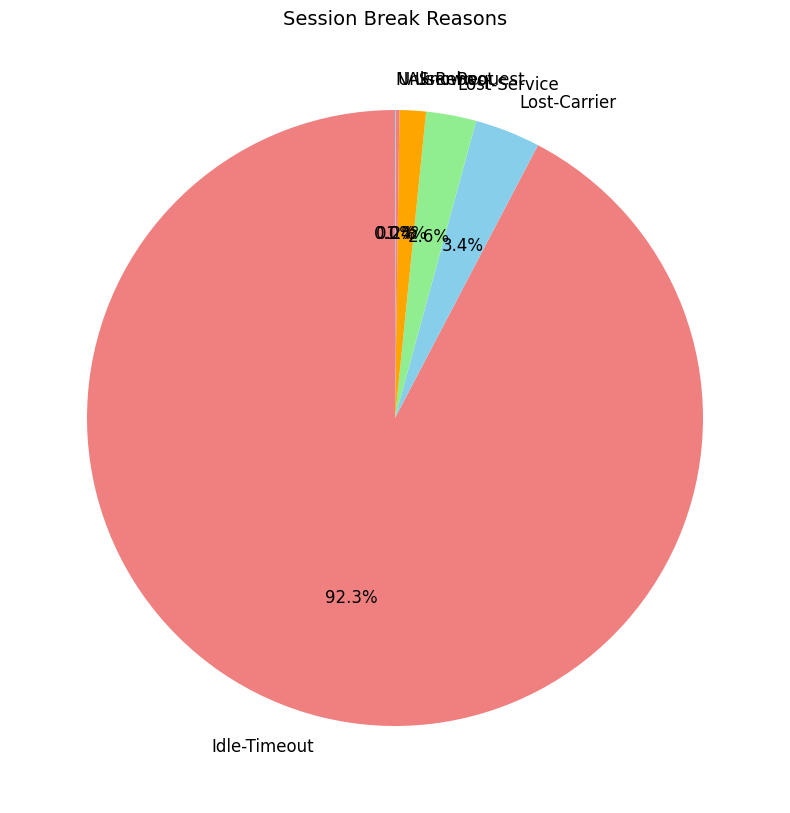

In [109]:
# Grouping the data by 'seession_break_reason' and counting the occurrences
session_break_counts = df['seession_break_reason'].value_counts()

# Plotting a pie chart with an adjusted figure size
plt.figure(figsize=(10, 10))  # Increase the figure size
session_break_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'orange'], startangle=90, textprops={'fontsize': 12})  # Increase font size for clarity
plt.title('Session Break Reasons', fontsize=14)
plt.ylabel('')  # Removing the y-axis label
plt.show()


Exercise-8:Pair Plot

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

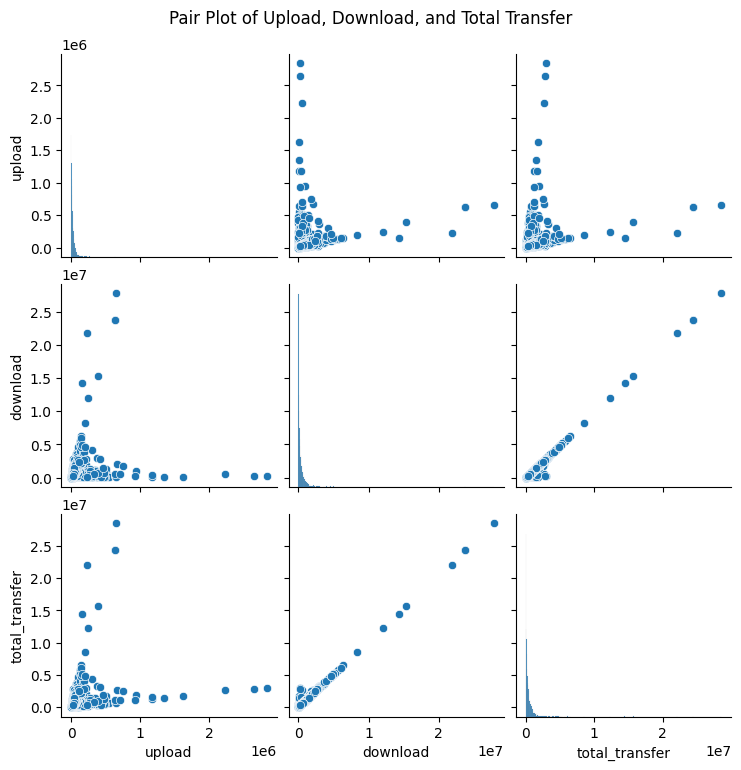

In [110]:
# Selecting the relevant columns for the pair plot
df_pair = df[['upload', 'download', 'total_transfer']]

# Plotting the pair plot
sns.pairplot(df_pair, kind='scatter', palette='coolwarm')
plt.suptitle('Pair Plot of Upload, Download, and Total Transfer', y=1.02)
plt.show()


Exercise-9:Count Plot

<ipython-input-112-c5e08ad0f4af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seession_break_reason', data=df, palette='Set2')


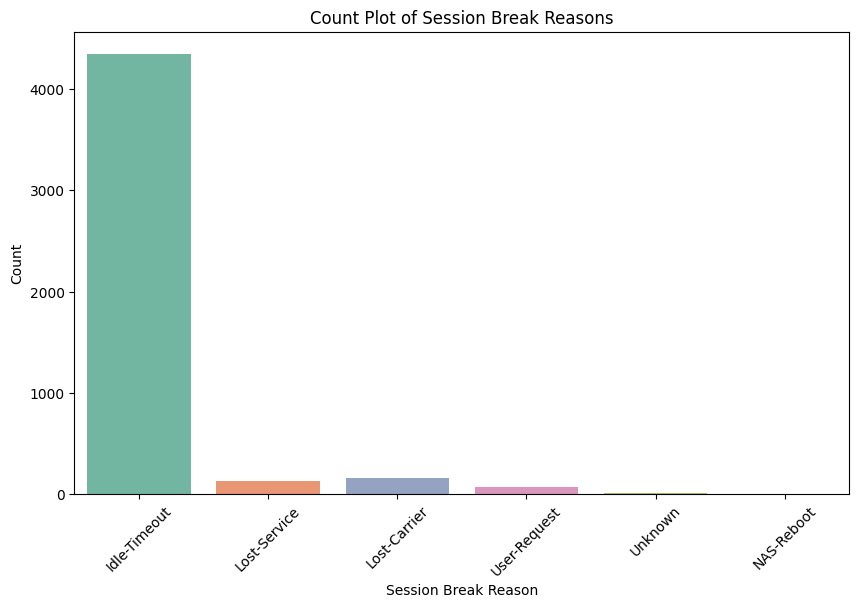

In [112]:
# Plotting a count plot for 'seession_break_reason'
plt.figure(figsize=(10, 6))
sns.countplot(x='seession_break_reason', data=df, palette='Set2')
plt.title('Count Plot of Session Break Reasons')
plt.xlabel('Session Break Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Exercise-10:Violin Plot

<ipython-input-113-458c0387c053>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='seession_break_reason', y='upload', data=df, palette='muted')


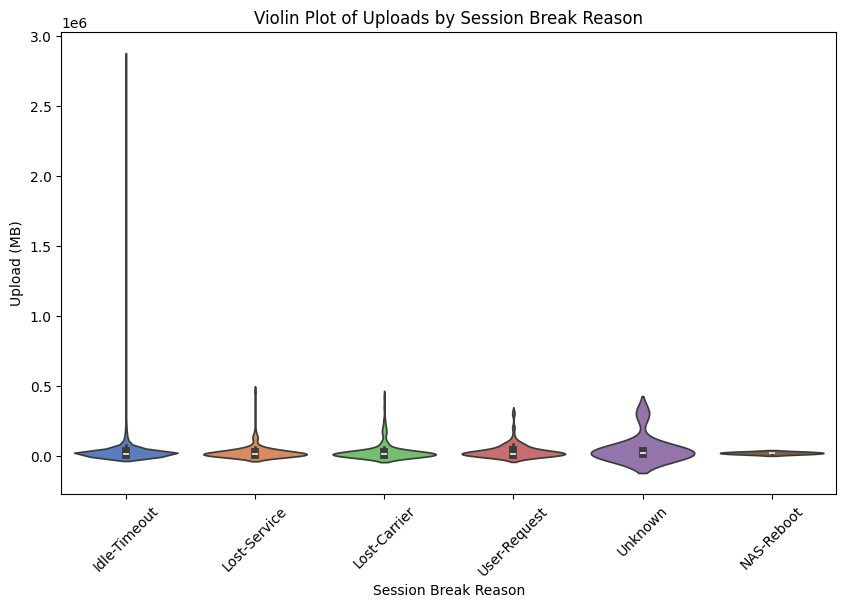

In [113]:
# Plotting a violin plot of 'upload' based on 'seession_break_reason'
plt.figure(figsize=(10, 6))
sns.violinplot(x='seession_break_reason', y='upload', data=df, palette='muted')
plt.title('Violin Plot of Uploads by Session Break Reason')
plt.xlabel('Session Break Reason')
plt.ylabel('Upload (MB)')
plt.xticks(rotation=45)
plt.show()
